In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam JOIN chiisat ON vam.school_id = chiisat.school_id WHERE vam.grade = %s AND vam.year = %s AND chiisat.grade = %s AND chiisat.year = %s ORDER BY vam.school_id;"

data = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['7th Grade','2011','7th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

data[:3]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color,school_name,school_id,unit,network,grade,year,readme,mathme,compme,readexc,mathexc,compexc,readmeet,mathmeet,compmeet,readblw,mathblw,compblw,readwrn,mathwrn,compwrn,readtst,mathtst
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,7th Grade,2011,41.0,0.5,-0.5 to 1.6,73,yellow,41.0,0.5,-0.1 to 1.2,72,yellow,"LOCKE, A CHTR",400011,4730,Charter,7th Grade,2011,82.9,95.1,83.7,14.6,31.7,16.3,68.3,63.4,67.5,17.1,4.9,14.6,0.0,0.0,1.6,41,41
1,AMANDLA CHTR HS,400012,Southwest Side HS Network,7th Grade,2011,97.4,-0.8,-1.6 to 0,20,red,97.4,1.5,1 to 2,94,green,AMANDLA CHTR HS,400012,2035,Charter,7th Grade,2011,72.6,77.4,73.7,6.6,23.6,11.7,66.0,53.8,62.0,25.5,17.9,21.8,1.9,4.7,4.4,106,106
2,ASPIRA CHTR - HAUGAN,400017,O'Hare,7th Grade,2011,178.7,-1.2,-1.8 to -0.5,11,red,178.7,-0.4,-0.8 to 0,37,red,ASPIRA CHTR - HAUGAN,400017,3500,Charter,7th Grade,2011,63.5,73.0,68.6,5.2,12.3,8.7,58.3,60.7,59.9,31.8,21.3,23.9,4.7,5.7,7.6,211,211


In [4]:
data.dtypes
#Check if sql request was successful - yes, number matches that found in excel
#data.info()

school_name                object
school_id                  object
network                    object
grade                      object
year                       object
reading_studentsnumber    float64
reading_vam               float64
reading_confidence         object
reading_percentile        float64
reading_color              object
math_studentsnumber       float64
math_vam                  float64
math_confidence            object
math_percentile           float64
math_color                 object
school_name                object
school_id                  object
unit                       object
network                    object
grade                      object
year                       object
readme                    float64
mathme                    float64
compme                    float64
readexc                   float64
mathexc                   float64
compexc                   float64
readmeet                  float64
mathmeet                  float64
compmeet      

In [5]:
data.shape

(425, 38)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     62.30
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           2.55e-14
Time:                        16:51:16   Log-Likelihood:                -1710.3
No. Observations:                 425   AIC:                             3425.
Df Residuals:                     423   BIC:                             3433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     72.2465      0.659    109.626      0.000        70.951    73.542
x              5.2038      0.659      7.893      0.000         3.908     6.500
==============================================================================
Omnibus:                        3.305   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.692
Skew:                           0.078   Prob(JB):                        0.260
Kurtosis:                       2.643   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

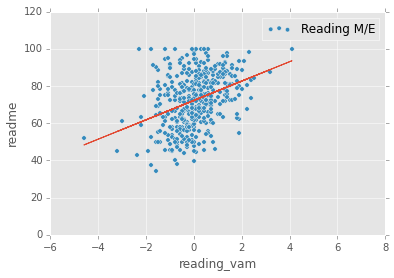

In [4]:
x = data['reading_vam']
y = data['readme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readme',label="Reading M/E")
plt.ylim(0, 120)
plt.xlim(-6, 8)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     36.69
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           3.06e-09
Time:                        11:05:03   Log-Likelihood:                -1753.5
No. Observations:                 425   AIC:                             3511.
Df Residuals:                     423   BIC:                             3519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.5072      0.730     21.256      0.000        14.073    16.941
x              4.4206      0.730      6.057      0.000         2.986     5.855
==============================================================================
Omnibus:                      225.927   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.031
Skew:                           2.302   Prob(JB):                    2.51e-284
Kurtosis:                      10.250   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

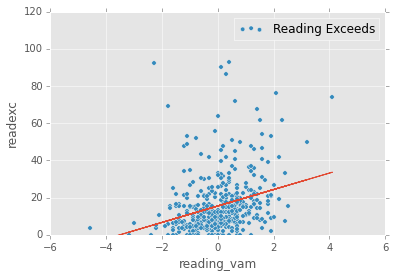

In [7]:
x = data['reading_vam']
y = data['readexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readexc',label="Reading Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.079
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.150
Time:                        11:05:17   Log-Likelihood:                -1627.3
No. Observations:                 425   AIC:                             3259.
Df Residuals:                     423   BIC:                             3267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.7375      0.542    104.654      0.000        55.672    57.803
x              0.7820      0.542      1.442      0.150        -0.284     1.848
==============================================================================
Omnibus:                       77.957   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.073
Skew:                          -0.933   Prob(JB):                     2.91e-40
Kurtosis:                       5.607   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

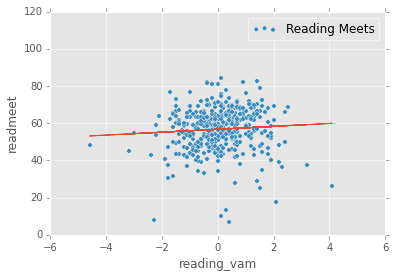

In [8]:
x = data['reading_vam']
y = data['readmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readmeet',label="Reading Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     60.51
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           5.66e-14
Time:                        11:05:37   Log-Likelihood:                -1697.1
No. Observations:                 425   AIC:                             3398.
Df Residuals:                     423   BIC:                             3406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     27.0324      0.639     42.314      0.000        25.777    28.288
x             -4.9713      0.639     -7.779      0.000        -6.227    -3.715
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.195
Skew:                          -0.069   Prob(JB):                        0.334
Kurtosis:                       2.676   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

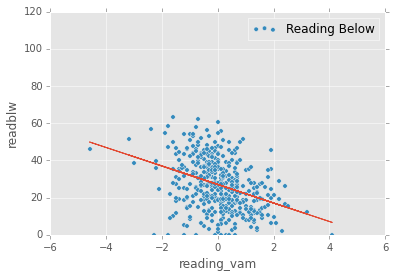

In [9]:
x = data['reading_vam']
y = data['readblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readblw',label="Reading Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     12.72
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           0.000403
Time:                        11:06:02   Log-Likelihood:                -731.43
No. Observations:                 425   AIC:                             1467.
Df Residuals:                     423   BIC:                             1475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7238      0.066     10.990      0.000         0.594     0.853
x             -0.2350      0.066     -3.567      0.000        -0.364    -0.105
==============================================================================
Omnibus:                      240.647   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.037
Skew:                           2.449   Prob(JB):                         0.00
Kurtosis:                      10.907   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

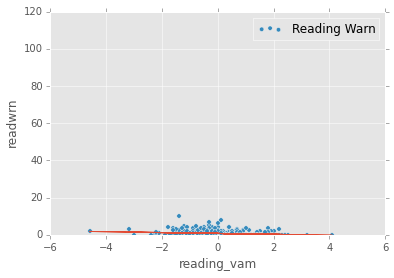

In [10]:
x = data['reading_vam']
y = data['readwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='reading_vam', y='readwrn',label="Reading Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     131.7
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           9.82e-27
Time:                        11:06:31   Log-Likelihood:                -1685.4
No. Observations:                 425   AIC:                             3375.
Df Residuals:                     423   BIC:                             3383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     76.7879      0.625    122.881      0.000        75.560    78.016
x              6.9987      0.610     11.478      0.000         5.800     8.197
==============================================================================
Omnibus:                       10.195   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.449
Skew:                          -0.384   Prob(JB):                      0.00538
Kurtosis:                       3.027   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

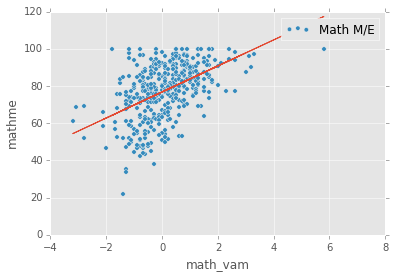

In [11]:
x = data['math_vam']
y = data['mathme']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathme',label="Math M/E")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     81.51
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           6.22e-18
Time:                        11:07:02   Log-Likelihood:                -1801.9
No. Observations:                 425   AIC:                             3608.
Df Residuals:                     423   BIC:                             3616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.4429      0.822     24.870      0.000        18.827    22.059
x              7.2408      0.802      9.028      0.000         5.664     8.817
==============================================================================
Omnibus:                      156.009   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.440
Skew:                           1.682   Prob(JB):                    1.78e-115
Kurtosis:                       7.305   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

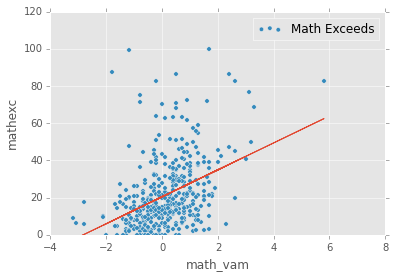

In [12]:
x = data['math_vam']
y = data['mathexc']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathexc',label="Math Exceeds")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1537
Date:                Mon, 03 Aug 2015   Prob (F-statistic):              0.695
Time:                        11:07:30   Log-Likelihood:                -1694.2
No. Observations:                 425   AIC:                             3392.
Df Residuals:                     423   BIC:                             3400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     56.3467      0.638     88.333      0.000        55.093    57.601
x             -0.2440      0.622     -0.392      0.695        -1.467     0.979
==============================================================================
Omnibus:                       74.821   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.692
Skew:                          -0.995   Prob(JB):                     1.26e-30
Kurtosis:                       4.953   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

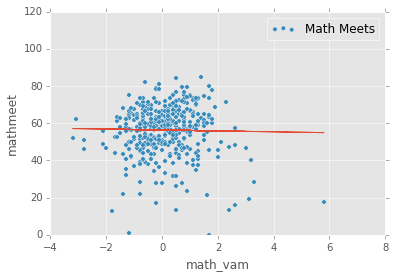

In [13]:
x = data['math_vam']
y = data['mathmeet']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathmeet',label="Math Meets")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           1.51e-25
Time:                        11:07:56   Log-Likelihood:                -1614.4
No. Observations:                 425   AIC:                             3233.
Df Residuals:                     423   BIC:                             3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     19.5349      0.529     36.943      0.000        18.495    20.574
x             -5.7611      0.516    -11.166      0.000        -6.775    -4.747
==============================================================================
Omnibus:                       11.282   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.652
Skew:                           0.405   Prob(JB):                      0.00295
Kurtosis:                       3.027   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

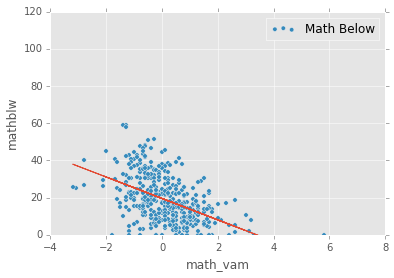

In [14]:
x = data['math_vam']
y = data['mathblw']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathblw',label="Math Below")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     55.93
Date:                Mon, 03 Aug 2015   Prob (F-statistic):           4.37e-13
Time:                        11:08:39   Log-Likelihood:                -1130.9
No. Observations:                 425   AIC:                             2266.
Df Residuals:                     423   BIC:                             2274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6788      0.169     21.704      0.000         3.346     4.012
x             -1.2369      0.165     -7.479      0.000        -1.562    -0.912
==============================================================================
Omnibus:                       70.734   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.374
Skew:                           1.068   Prob(JB):                     7.96e-24
Kurtosis:                       4.200   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

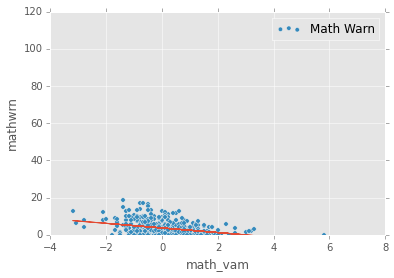

In [15]:
x = data['math_vam']
y = data['mathwrn']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=data).fit()

data.plot(kind='scatter', x='math_vam', y='mathwrn',label="Math Warn")
plt.ylim(0, 120)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()